In [1]:
# Here we will work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

#The company is trying to decide whether to focus their efforts on their mobile app experience or their website. So here is the analysis of the Ecommerce Company dataset and gaining some useful insights regarding the concern.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers=pd.read_csv(r'C:\Users\Devan\Desktop\MachineLearning\Data-Science-and-Machine-Learning-Projects-master\EcommerceDataset.csv')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [7]:
# Esplore the Data

# Use Seaborn to create a jointplot to compare the time on website and YearlyAmountSpentColumn

sns.color_palette('Greys')
sns.set_style('dark')

C:\Users\Devan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Devan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


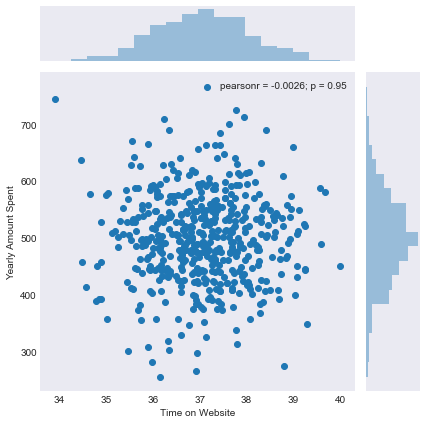

In [8]:
# Its time to join the plot

sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

C:\Users\Devan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Devan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


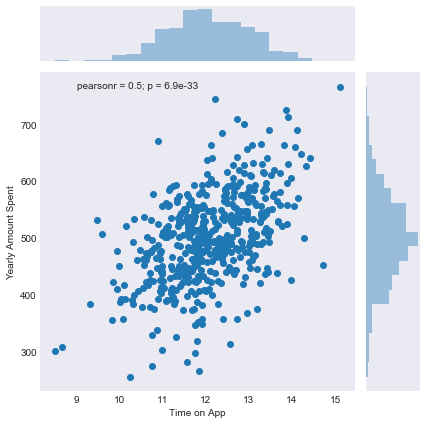

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

C:\Users\Devan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Devan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


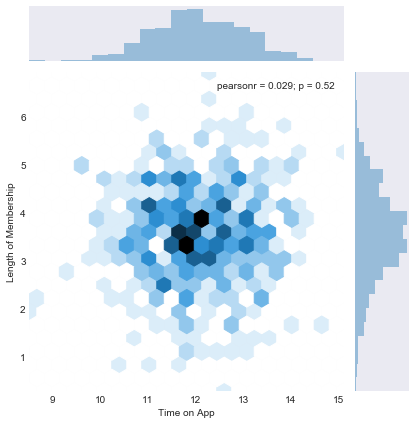

In [10]:
# Using jointplot to create a 2D hex bin plot comparing Time On App and Length Of Membership

sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

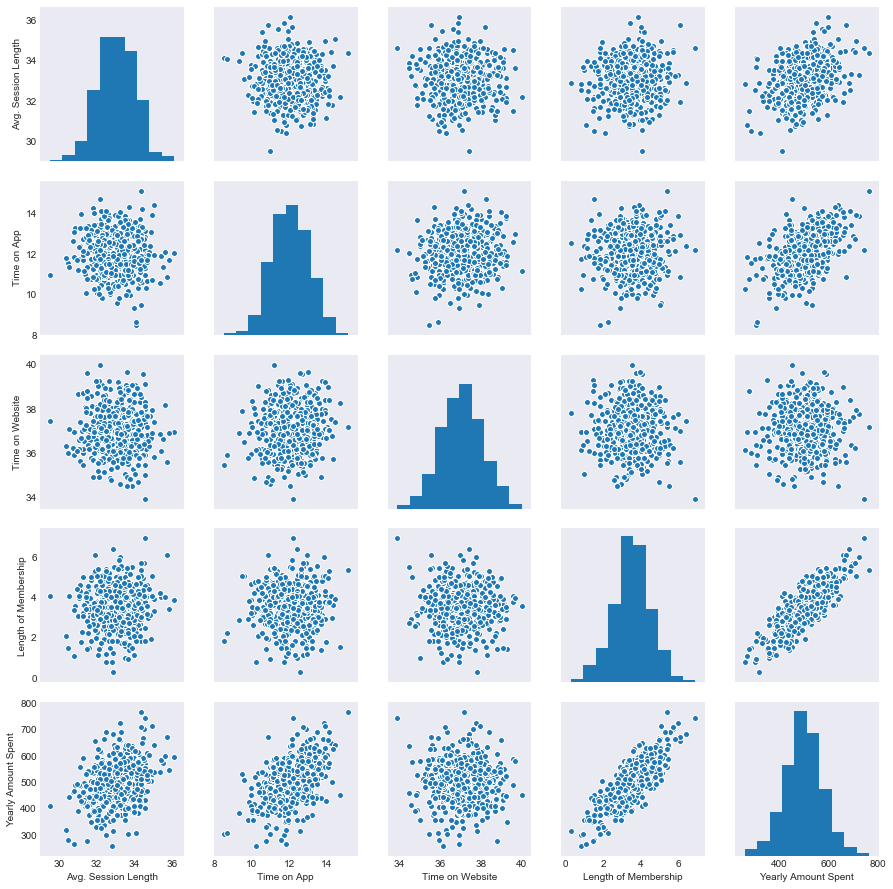

In [11]:
#Let's explore these types of relationships across the entire data set. 
#Use pairplot to recreate the plot below.(Don't worry about the the colors)

sns.pairplot(customers)

In [12]:
# Having a look at this pairplots of Yearly Amount Spent and the Length of Membership has the scattered plot very close to
#eachother and they are highly correlated.

# Creating a linearmodelPlot using Seaborns lmplot between those will create an impact in the graph

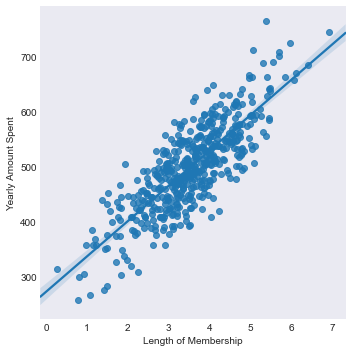

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [14]:
# Now Its the time to training and testing Data. Split the Data into trainig and testing set.

# Setting the variable X = numerical features of Customers and Y = Yearly Amount Spent

X=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [15]:
Y=customers['Yearly Amount Spent']

In [16]:
# Import sklearn for the lm model
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [18]:
# Training the Model --> Import Linear regression from sklearn.linear_model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
# Train and fit the model using the training data

lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# to Print the Co efficient of the model
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [ ]:
# Next to Preicting the Test Data

In [23]:
PredictedYVal = lm.predict(X_test)

In [24]:
# Now the Predictedval of Y has been stored in PredictedYVal
#Lets plot the values of realtestvalue and the predicted value

Text(0,0.5,'Predicted Y value')

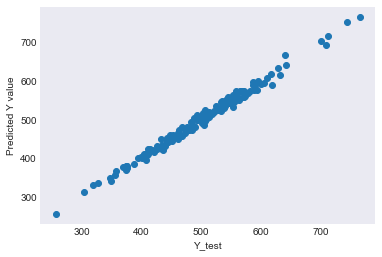

In [26]:
plt.scatter(Y_test,PredictedYVal)
plt.xlabel('Y_test')
plt.ylabel('Predicted Y value')